In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import cm as c

#import matplotlib.pyplot.grid

cm=plt.get_cmap('nipy_spectral') # for the plotting
df=pd.read_csv('TrainSample.csv',sep=';' )
df2=pd.read_csv('TestSample.csv',sep=';' )

In [23]:
def lin_regr(namex,namey,df):
    model = linear_model.LinearRegression()
    nansx= np.array(np.isnan(df[namex]))
    nansy= np.array(np.isnan(df[namey]))
    nan=np.logical_or(nansx,nansy)
    df_nonans=df[np.logical_not(nan)]
    x=df_nonans[namex].values
    x=[e for e in x]
    x=np.array(x)
    y=df_nonans[namey].values
    y=[e for e in y]
    y=np.array(y)
    model.fit(x[:, np.newaxis], y)
    res= model.coef_
    print("we estimate y= ax+b, with a equals:"+ str(res))
    return res

We check how many different values zone has

## Train


In [34]:
zones_distribution=df.groupby('Zone')['API'].count()
zones_distribution # len = 10

Zone
0    208
1    109
2     53
3      3
4     54
5     15
6      6
7      5
8      5
9      2
Name: API, dtype: int64

## Test


In [40]:
zones_distribution_test=df2.groupby('Zone')['API'].count()
zones_distribution_test # len = 11

Zone
0     91
1     63
2     28
3      3
4     31
5      7
6      4
7      4
8      2
9      1
10     1
Name: API, dtype: int64

## Result: The test set has 1 zone more (zone 10) than the train set, but it contains only 1 member
( red dot in the right plot below)

In [41]:
z2=df2['Zone']
unique_vals2=list(z2.unique())
u2=[unique_vals2.index(e) for e in z2]
df2['Zone']=u2#pd.Series(u, dtype="category")
zones_distribution_test=df.groupby('Zone')['API'].count()

In [42]:
z=df['Zone']
u=[unique_vals2.index(e) for e in z]
df['Zone']=u#pd.Series(u, dtype="category")
zones_distribution=df.groupby('Zone')['API'].count()

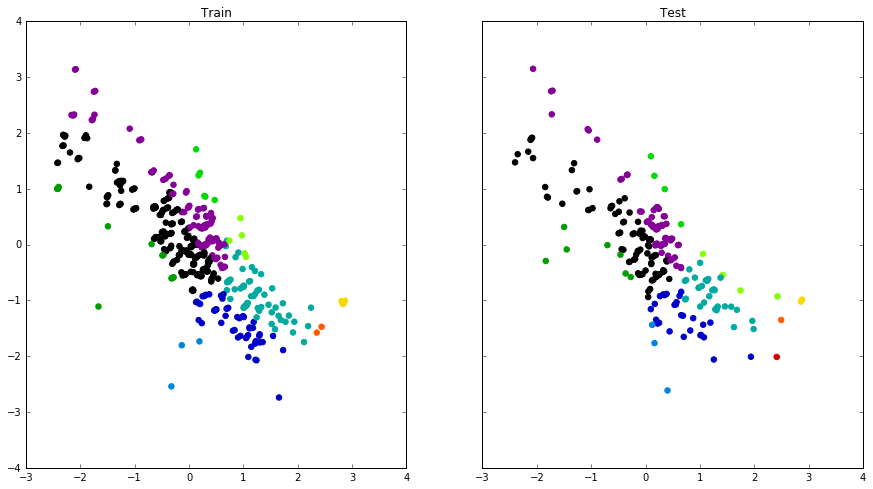

In [46]:
plt.figure()
f, axarr = plt.subplots(ncols=2,sharey=True)
f.set_figheight(8)
f.set_figwidth(15)


axarr[0].scatter(df['Surf_X'],df['Surf_Y'],color=cm(df['Zone']/11.0),s=30)
axarr[0].set_title('Train')
axarr[1].scatter(df2['Surf_X'],df2['Surf_Y'],color=cm(df2['Zone']/11.0),s=30)
axarr[1].set_title('Test')